In [5]:
import os
import pandas as pd
import warnings
import sys
sys.path.insert(0, '..') #sys allows for the .ipynb file to connect to the shared folder files
from shared_scripts import Hindcast_Initialization, FigureDeveloper
import hydroeval as he
import sklearn
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Set working directories
cwd = os.getcwd() 
datapath = f"{os.path.expanduser('~')}/SWEML"
warnings.filterwarnings("ignore")

In [179]:
import importlib
importlib.reload(FigureDeveloper)

<module 'shared_scripts.FigureDeveloper' from '/home/rjohnson18/SWEML/Model/Neural_Network/../shared_scripts/FigureDeveloper.py'>

In [184]:
#Get datetime and corresponding background information to evaluate hindcast
#Need to load predictions2022-09-24.h5, 2019_predictions.h5 (if straight to here and did not make predictions)  

new_year = '2019'
threshold = '20.0'
Region_list = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low','Greater_Yellowstone', 
     'N_Co_Rockies', 'SW_Mont', 'SW_Co_Rockies', 'GBasin', 'N_Wasatch', 'N_Cascade',
     'S_Wasatch', 'SW_Mtns', 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'SE_Co_Rockies', 
     'Sawtooth', 'Ca_Coast', 'E_Or', 'N_Yellowstone', 'S_Cascade', 'Wa_Coast',
     'Greater_Glacier', 'Or_Coast'
              ]

Maritime_Region = ['S_Sierras_High','S_Sierras_Low', 'N_Sierras','S_Cascade',
                      'N_Cascade', 'Ca_Coast', 'Wa_Coast', 
                      'Or_Coast']

Prairie_Region  =  ['N_Yellowstone','SW_Mont', 'GBasin', 'S_Wasatch', 'Sawtooth', 'SW_Mtns']

Alpine_Region =['E_Or', 'N_Wasatch', 'E_WA_N_Id_W_Mont', 'Greater_Yellowstone', 'N_Co_Rockies','S_Wyoming', 'SW_Co_Rockies',
                        'Greater_Glacier', 'SE_Co_Rockies']

model = 'Neural_Network'


datelist = Hindcast_Initialization.Hindcast_Initialization(cwd, datapath, new_year, threshold, Region_list)
EvalDF = Hindcast_Initialization.HindCast_DataProcess(datelist,Region_list, cwd, datapath, model)

Creating files for a historical simulation within  'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low', 'Greater_Yellowstone', 'N_Co_Rockies', 'SW_Mont', 'SW_Co_Rockies', 'GBasin', 'N_Wasatch', 'N_Cascade', 'S_Wasatch', 'SW_Mtns', 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'SE_Co_Rockies', 'Sawtooth', 'Ca_Coast', 'E_Or', 'N_Yellowstone', 'S_Cascade', 'Wa_Coast', 'Greater_Glacier', 'Or_Coast'  regions for water year  2019
New simulation start files complete
Getting prediction files
Site data processing complete, setting up prediction dataframes...
Finalizing Evaluation dataframes...


In [185]:
FigureDeveloper.Peak_SWE(datelist, EvalDF, Region_list)

,ObsMax,PredMax,ObsMaxDate,PredMaxDate
Region,,,,
Northern Sierra Nevada,139.107333,141.081755,2019-04-02,2019-04-09
Southern Sierra Nevada High,133.996545,146.605839,2019-04-09,2019-04-02
Southern Sierra Nevada Low,100.838,67.059062,2019-03-26,2019-03-26
Greater Yellowstone,32.900471,31.704046,2019-04-16,2019-04-02
Upper Colorado Rockies,51.107474,52.685873,2019-04-16,2019-04-16
SW Montana,46.0756,47.342161,2019-04-16,2019-04-16
San Juan Mountains,55.372,70.143943,2019-04-02,2019-04-16
Great Basin,46.455263,49.150289,2019-03-26,2019-03-12
Northern Wasatch,61.896625,71.77316,2019-04-16,2019-04-16


In [186]:
Model_Results = FigureDeveloper.Dict_2_DF(EvalDF, Region_list)
Model_Results.head()

,y_test,y_pred,Region,Date,y_test_prev,prev_SWE,Long,Lat,elevation_m,WYWeek,northness,VIIRS_SCA,hasSnow,prev_SWE_error,y_pred_fSCA,error
00c4db22-a423-41a4-ada6-a8b1b04153a4,6.858,6.345891,Northern Sierra Nevada,2018-12-11,0.0,3.126142,-121.939413,41.166647,1661.50,10.0,-0.167901,55.500000,True,-1.230765,6.345891,0.512109
018cf1a1-f945-4097-9c47-0c4690538bb5,17.780,11.836120,Northern Sierra Nevada,2018-12-11,0.0,9.369790,-120.618890,39.675880,2057.50,10.0,-0.006909,55.500000,True,-3.688894,11.836120,5.943880
147d5eb4-e574-47e4-994a-8a2908c06050,11.176,10.136005,Northern Sierra Nevada,2018-12-11,0.0,7.414898,-120.879401,39.786417,2013.00,10.0,0.011996,70.166667,True,-2.919251,10.136005,1.039995
6dd37e24-0a9c-4749-8ab6-7e26d42925d6,10.160,7.324366,Northern Sierra Nevada,2018-12-11,0.0,4.214518,-121.786700,40.780052,1787.00,10.0,-0.191108,56.500000,True,-1.659259,7.324366,2.835634
76b55900-eb3d-4d25-a538-f74302ffe72d,15.494,17.716959,Northern Sierra Nevada,2018-12-11,0.0,13.316327,-120.178716,41.993149,2261.25,10.0,0.039906,100.000000,True,-5.242649,17.716959,-2.222959


In [187]:
#put all regions together for basic metrics
allregions = pd.DataFrame()
for region in EvalDF.keys():
    allregions = pd.concat([allregions, EvalDF[region]])
    
y_pred = allregions['y_pred_fSCA']
y_test = allregions['y_test']
    
kge, r, alpha, beta = he.evaluator(he.kge, y_pred, y_test)
rmse = sklearn.metrics.mean_squared_error(y_test, y_pred, squared = False)
pbias = he.evaluator(he.pbias, y_pred, y_test)


print('There are ', len(allregions), ' hindcast evaluation obs')
print('All regions KGE is: ', kge[0])
print('All regions rmse is: ', rmse)
print('All regions pbias is: ', pbias[0])


There are  6212  hindcast evaluation obs
All regions KGE is:  0.8318993092100895
All regions rmse is:  16.575552008670147
All regions pbias is:  5.696369570742343


In [188]:
Maritime_Region, Prairie_Region, Alpine_Region, Snow_Class = FigureDeveloper.Sturm_Classified_Performance(Model_Results)

Maritime  RMSE:  26.199137770033982  R2:  0.6820441244066424 pbias: [17.498795]
Alpine  RMSE:  11.839739127995184  R2:  0.7328582984587237 pbias: [0.32024751]
Prairie  RMSE:  11.693965598756499  R2:  0.7146063270424805 pbias: [-4.90691345]


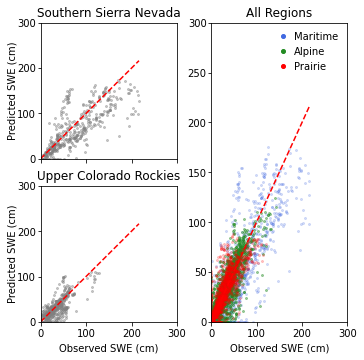

In [189]:
FigureDeveloper.Slurm_Class_parity(Model_Results, Maritime_Region, Prairie_Region, Alpine_Region)

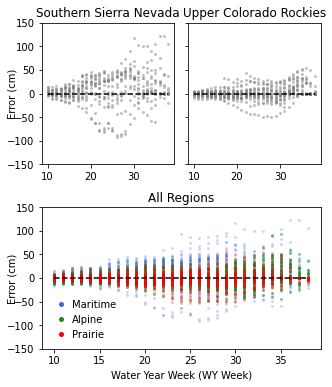

In [190]:
FigureDeveloper.EvalPlots3(Model_Results, Maritime_Region, Prairie_Region, Alpine_Region, 'WYWeek', 'error', 'Water Year Week (WY Week)', 'Error (cm)', 'ErrorVsWYWeek', 2)

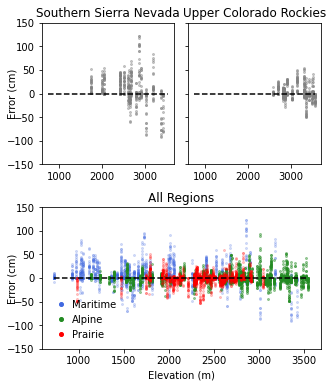

In [191]:
FigureDeveloper.EvalPlots3(Model_Results, Maritime_Region, Prairie_Region, Alpine_Region,'elevation_m', 'error', 'Elevation (m)', 'Error (cm)', 'ErrorVsElevation', 2)

['NW Rockies', 'Northern Colorado Rockies', 'Northern Wasatch', 'Upper Colorado Rockies']


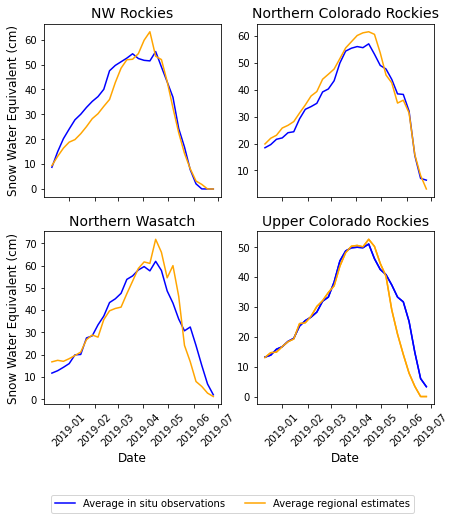

In [183]:
Regions = [ 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'N_Wasatch','N_Co_Rockies']
name = 'Alpine'
FigureDeveloper.SWE_TS_plot(datelist, EvalDF, Regions, name)

['Northern Sierra Nevada', 'Southern Sierra Nevada High', 'Southern Sierra Nevada Low', 'Southern Cascades', 'SW Montana', 'Great Basin', 'SW Utah', 'Sawtooth', 'NW Rockies', 'Northern Colorado Rockies', 'Northern Wasatch', 'Upper Colorado Rockies']


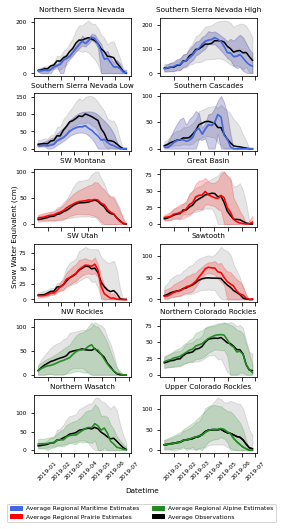

In [178]:
importlib.reload(FigureDeveloper)

Maritime = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low','S_Cascade']
Prarie = [ 'SW_Mont', 'GBasin', 'S_Wasatch','Sawtooth']
Alpine = [ 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'N_Wasatch','N_Co_Rockies']

plotname = 'All_Regions_TS'
RegionDict, RegionAll = FigureDeveloper.SWE_TS_plot_classes(datelist, EvalDF, Maritime, Prarie, Alpine, plotname, fontsize = 6, opacity=0.1)

#gold to red, adjust the y-axis font size, increase y-axis labelsize, increase width between subplots, overall y-axis label

processing predictions into geodataframe


100%|██████████| 1/1 [00:00<00:00, 45.42it/s]


creating figures for each prediction timestep


  0%|          | 0/1 [00:00<?, ?it/s]

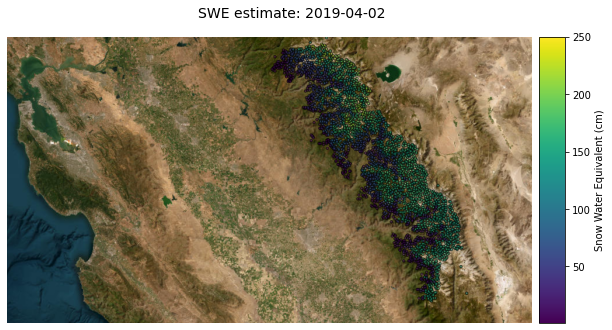

100%|██████████| 1/1 [00:08<00:00,  8.78s/it]


In [18]:

Region_list = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low']
#Get list of optional tiles here: https://contextily.readthedocs.io/en/latest/providers_deepdive.html
variant = 'World_Imagery'#   'World_Physical_Map'
date = ["2019-04-02"]
FigureDeveloper.SSM_Fig(date, Region_list,variant)

In [300]:
#make snow class cdfs
Maritime_Region = ['S_Sierras_High','S_Sierras_Low', 'N_Sierras','S_Cascade',
                      'N_Cascade', 'Ca_Coast', 'Wa_Coast', 
                      'Or_Coast']

Prairie_Region  =  ['N_Yellowstone','SW_Mont', 'GBasin', 'S_Wasatch', 'Sawtooth', 'SW_Mtns']

Alpine_Region =['E_Or', 'N_Wasatch', 'E_WA_N_Id_W_Mont', 'Greater_Yellowstone', 'N_Co_Rockies','S_Wyoming', 'SW_Co_Rockies',
                        'Greater_Glacier', 'SE_Co_Rockies']


In [139]:
MaritimeNSE = FigureDeveloper.slurmNSE(EvalDF, Maritime_Region)
PrarieeNSE = FigureDeveloper.slurmNSE(EvalDF, Prairie_Region)
AlpineNSE = FigureDeveloper.slurmNSE(EvalDF, Alpine_Region)

In [223]:
SNODAS = pd.read_pickle(r'Predictions/Hold_Out_Year/SNODAS/SNODAS_WY2018.pkl')

#remove lat/long
for region in SNODAS.keys():
    SNODAS[region].pop('Long')
    SNODAS[region].pop('Lat')
    

In [310]:
importlib.reload(FigureDeveloper)
#read in SNODAS pickle
SNODAS = pd.read_pickle(r'Predictions/Hold_Out_Year/SNODAS/SNODAS_WY2018.pkl')

#remove lat/long
for region in SNODAS.keys():
    SNODAS[region].pop('Long')
    SNODAS[region].pop('Lat')

SNODAS_MaritimeNSE = FigureDeveloper.SNODASslurmNSE(EvalDF, SNODAS, Maritime_Region)
SNODAS_PrarieNSE = FigureDeveloper.SNODASslurmNSE(EvalDF, SNODAS, Prairie_Region)
SNODAS_AlpineNSE = FigureDeveloper.SNODASslurmNSE(EvalDF, SNODAS, Alpine_Region)

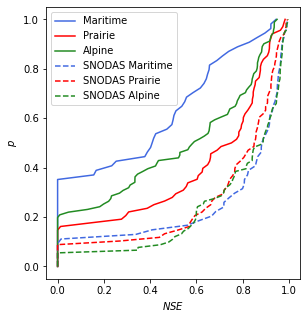

In [311]:
FigureDeveloper.regionCDF(MaritimeNSE, PrarieeNSE, AlpineNSE, SNODAS_MaritimeNSE, SNODAS_PrarieNSE, SNODAS_AlpineNSE, SNODAS=True, plt_save = True)

In [229]:
SNODAS['N_Sierras'].head(5)

,2018-10-02,2018-10-09,2018-10-16,2018-10-23,2018-10-30,2018-11-06,2018-11-13,2018-11-20,2018-11-27,2018-12-04,...,2019-04-23,2019-04-30,2019-05-07,2019-05-14,2019-05-21,2019-05-28,2019-06-04,2019-06-11,2019-06-18,2019-06-25
cell_id,,,,,,,,,,,,,,,,,,,,,
0013ea8d-f647-4664-b40f-57bb96f800e5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.025,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
001476f9-a9d5-4128-8210-e2c4879ce505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.010,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
00270da4-a790-4b81-a693-e1e8c4f13e6e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
00325ba7-fcbe-4bab-8c4f-f70cfe80ea46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.042,...,0.332,0.113,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
003ca3a3-c298-4253-9f1b-7f6a1a097ca6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045,0.114,...,1.522,1.470,1.298,1.145,1.214,1.257,1.103,0.834,0.527,0.162


In [227]:
sites = SNODAS['N_Sierras'].index
sites

Index(['0013ea8d-f647-4664-b40f-57bb96f800e5',
       '001476f9-a9d5-4128-8210-e2c4879ce505',
       '00270da4-a790-4b81-a693-e1e8c4f13e6e',
       '00325ba7-fcbe-4bab-8c4f-f70cfe80ea46',
       '003ca3a3-c298-4253-9f1b-7f6a1a097ca6',
       '00505b61-f978-44ee-92e8-c082c4482ac0',
       '0050f3a5-e24d-45d7-9ce1-f046a54adb96',
       '0051069d-cdc3-467b-9034-31f5e0eeb005',
       '0057c657-ac2f-4141-881c-3593859ef092',
       '0057dca9-9c70-4708-9697-909e5711a7f0',
       ...
       'ffa21d83-b0a3-4e34-a222-bcd0330b524b',
       'ffac3cf8-a5fc-49f1-a152-867d4612bf45',
       'ffb01bed-7372-4cf6-864b-005f98023af7',
       'ffb695e1-0cd3-4706-ade7-8d8ca05036d6',
       'ffb927ca-292e-439c-90f4-4a4c116ab01b',
       'ffbaa1a5-6e6c-47ab-b432-841932bfcf8e',
       'ffbecb71-8bc4-44fe-80b6-7e46d5a62813',
       'ffdb8d1c-7704-4a87-a22f-a68881cf9510',
       'ffeef29b-979e-4c1b-9ca6-a7ce0944af09',
       'ffefd240-fae9-4ab2-8821-75ea2bad321d'],
      dtype='object', name='cell_id', length=644

In [220]:
EvalDF['N_Sierras'].head()

,Date,y_test,y_test_prev,y_pred,prev_SWE,Long,Lat,elevation_m,WYWeek,northness,VIIRS_SCA,hasSnow,Region,prev_SWE_error,y_pred_fSCA
index,,,,,,,,,,,,,,,
00c4db22-a423-41a4-ada6-a8b1b04153a4,2018-12-11,6.858,0.0,6.345891,3.126142,-121.939413,41.166647,1661.50,10,-0.167901,55.500000,True,Northern Sierra Nevada,-1.230765,6.345891
018cf1a1-f945-4097-9c47-0c4690538bb5,2018-12-11,17.780,0.0,11.836120,9.369790,-120.618890,39.675880,2057.50,10,-0.006909,55.500000,True,Northern Sierra Nevada,-3.688894,11.836120
147d5eb4-e574-47e4-994a-8a2908c06050,2018-12-11,11.176,0.0,10.136005,7.414898,-120.879401,39.786417,2013.00,10,0.011996,70.166667,True,Northern Sierra Nevada,-2.919251,10.136005
6dd37e24-0a9c-4749-8ab6-7e26d42925d6,2018-12-11,10.160,0.0,7.324366,4.214518,-121.786700,40.780052,1787.00,10,-0.191108,56.500000,True,Northern Sierra Nevada,-1.659259,7.324366
76b55900-eb3d-4d25-a538-f74302ffe72d,2018-12-11,15.494,0.0,17.716959,13.316327,-120.178716,41.993149,2261.25,10,0.039906,100.000000,True,Northern Sierra Nevada,-5.242649,17.716959
